## pedestalSubtraction4XtalkCheckのアウトプットから損失率を求める。



***********************
 parameterLabel =  137dC10min
weldDate =  ['2023-11-07-215833', '2023-11-08-124310']
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: L1P1, dtype: float64
137dC10min loss = 0.0
1    0.894191
2    0.886485
3    0.745193
4    0.889903
5    0.844197
6    1.030473
7    0.940302
8    0.822723
9    0.715329
Name: L1P1, dtype: float64
137dC10min loss = 0.13680036105727134

***********************
 parameterLabel =  150dC3min
weldDate =  ['2023-11-02-191329', '2023-11-03-144727', '2023-11-03-200225', '2023-11-03-221341']
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: L1P1, dtype: float64
150dC3min loss = 0.0
1    0.808975
2    0.826997
3    0.898210
4    0.863656
5    0.890276
6    0.892019
7    0.843572
8    0.786858
9    0.875399
Name: L1P1, dtype: float64
150dC3min loss = 0.14600432621918935
1    0.669241
2    0.660949
3    0.739478
4    0.751113
5    0.762428
6    0.720442
7    0.637859
8

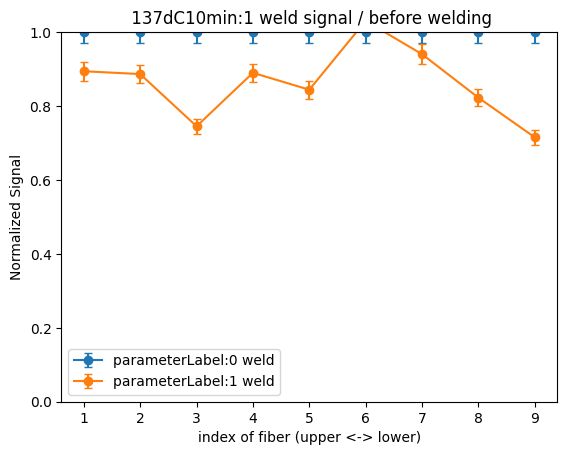

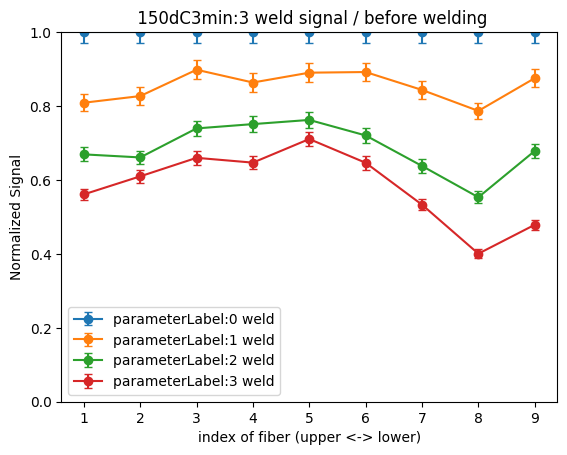

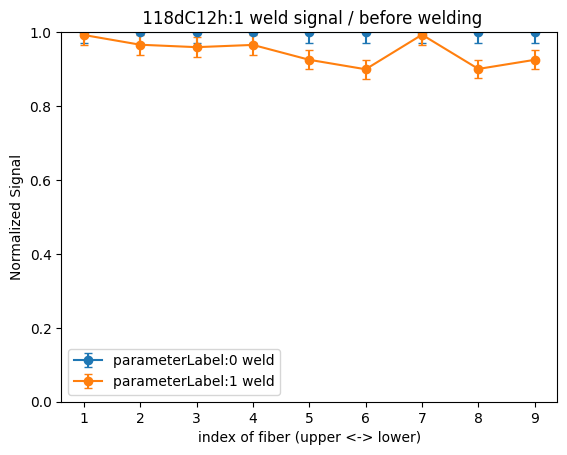

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plotDatasets = [# condition, before, after]
	['137dC10min','2023-11-07-215833','2023-11-08-124310']
	,['150dC3min','2023-11-02-191329','2023-11-03-144727','2023-11-03-200225','2023-11-03-221341']
	,['118dC12h','2023-12-19-215846','2023-12-20-191008']
	]
listDfs = [[]for _ in range (len(plotDatasets))]
listDfRatios=[]
errRatio = 0.02 # from the connector coupling reproducibility

#************************************************
for iParameter, listWelds in enumerate(plotDatasets):
	parameterLabel = listWelds[0]
	weldDate = listWelds[1:]
	nMeasureSample = len(weldDate)
	print("\n***********************\n"
			 ,"parameterLabel = ",parameterLabel)
	print("weldDate = ",weldDate)
	fig, ax = plt.subplots()

	for iweld,date in enumerate(weldDate):
		df = pd.read_csv(f'./outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}_ch1.csv')
		df.index += 1
		#print(df)
		listDfs[iParameter].append(df) #both  before and after are filled.
		#print(f'listDfs[{iParameter}][{iweld}] = \n',listDfs[iParameter][iweld])
		dfRatio = listDfs[iParameter][iweld]/listDfs[iParameter][0]
		mean_ratio = dfRatio.mean(numeric_only=True)
		listDfRatios.append(dfRatio)
		ch1Loss = dfRatio.iloc[:,0]
		print(ch1Loss)
	#************* plot *************
		x = np.arange(len(ch1Loss))+1
		y = ch1Loss.values.flatten()
		#print("y=", y)
		print(f'{parameterLabel} loss =',1-y.mean())
		yErr = y*np.sqrt(2)*errRatio
		ax.errorbar(x, y, yerr=yErr ,fmt='-o'
							 , capsize=3, label=f'parameterLabel:{iweld} weld')
		ax.set_title(f' {parameterLabel}:{iweld} weld signal / before welding')
		ax.set_xlabel('index of fiber (upper <-> lower)')
		ax.set_ylabel('Normalized Signal')
		ax.set_ylim([0, 1])
		ax.legend()
plt.show()
	
#df0 =pd.read_csv()

<Axes: >

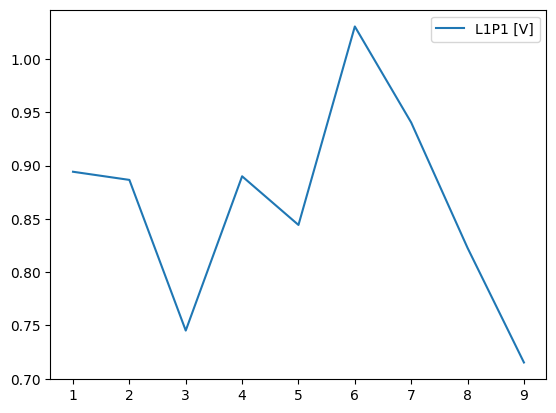

In [4]:

df_loss1.plot(y='L1P1 [V]'
							#, kind='line'
							)

In [11]:
import numpy as np

# 空の2次元ndarrayを作成
empty_array = np.empty((0, 2), dtype=int)

# 要素を追加
new_element = np.array([[1, 2]])
empty_array = np.append(empty_array, new_element, axis=0)

# 別の要素を追加
another_element = np.array([[3, 4]])
empty_array = np.append(empty_array, another_element, axis=0)

print(empty_array)

[[1 2]
 [3 4]]
